In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings('ignore')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
df=pd.read_csv('cleaneddata.csv')

In [3]:
rows,columns=df.shape

<Axes: xlabel='Tv'>

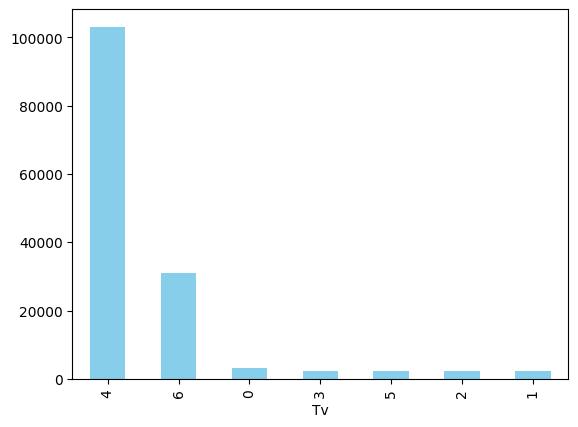

In [4]:
counts = df['Tv'].value_counts()
counts.plot(kind='bar', color='skyblue')

In [5]:
df['Tv'].value_counts(normalize=True)*100

Tv
4    70.649805
6    21.324285
0     2.103640
3     1.480568
5     1.480568
2     1.480568
1     1.480568
Name: proportion, dtype: float64

- An Inbalanced data where 4 has more data points than the other 6 classes combined with 70% being 4

In [6]:
non_bin=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']
df[non_bin].describe()

Elevation         Aspect          Slope  \
count  145890.000000  145890.000000  145890.000000   
mean     2874.458949     141.127418      11.925574   
std       210.801279     107.719296       6.319326   
min      1863.000000       0.000000       0.000000   
25%      2747.000000      54.000000       7.000000   
50%      2909.000000     108.000000      11.000000   
75%      3004.000000     217.000000      15.000000   
max      3849.000000     360.000000      61.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     145890.000000                   145890.000000   
mean                         251.824738                       34.554322   
std                          192.473899                       41.215776   
min                            0.000000                     -146.000000   
25%                           95.000000                        7.000000   
50%                          212.000000                       23.000000   
75%                          362.000000                       51.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    145890.000000  145890.000000   145890.000000   
mean                       3313.827541     217.368106      224.874748   
std                        1687.779953      21.590298       16.084851   
min                           0.000000       0.000000       99.000000   
25%                        1848.000000     207.000000      216.000000   
50%                        3420.000000     222.000000      226.000000   
75%                        4673.000000     232.000000      236.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count  145890.000000                       145890.000000  
mean      139.788203                         3044.958105  
std        31.311690                         1761.882341  
min         0.000000                            0.000000  
25%       121.000000                         1608.000000  
50%       140.000000                         2713.000000  
75%       159.000000                         4478.000000  
max       248.000000                         7173.000000

### Checking for Outliers

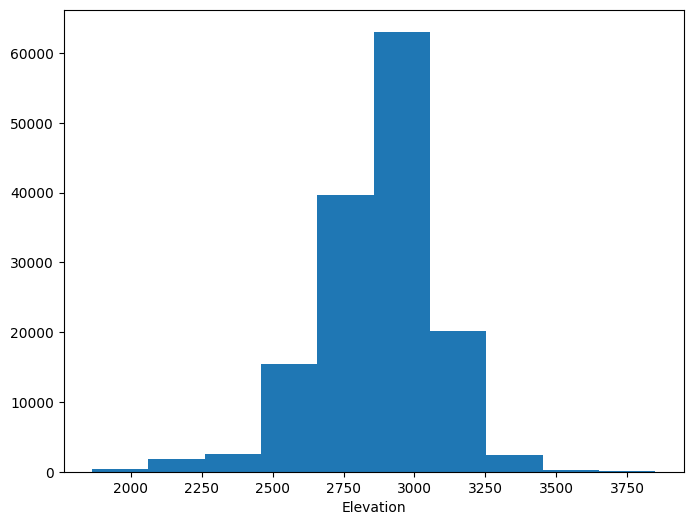

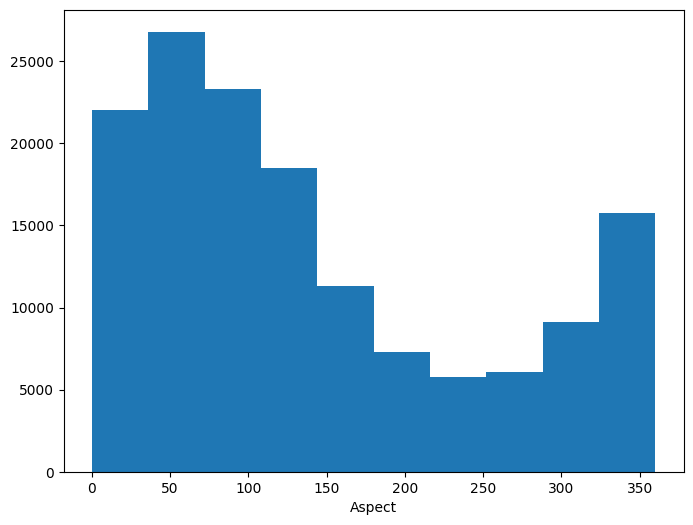

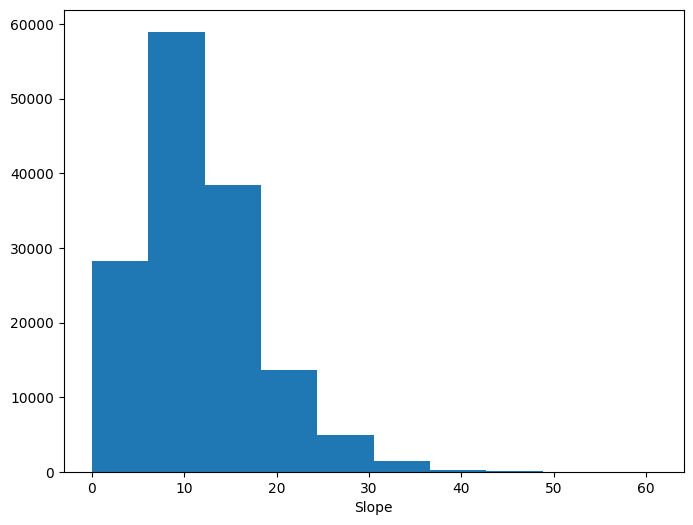

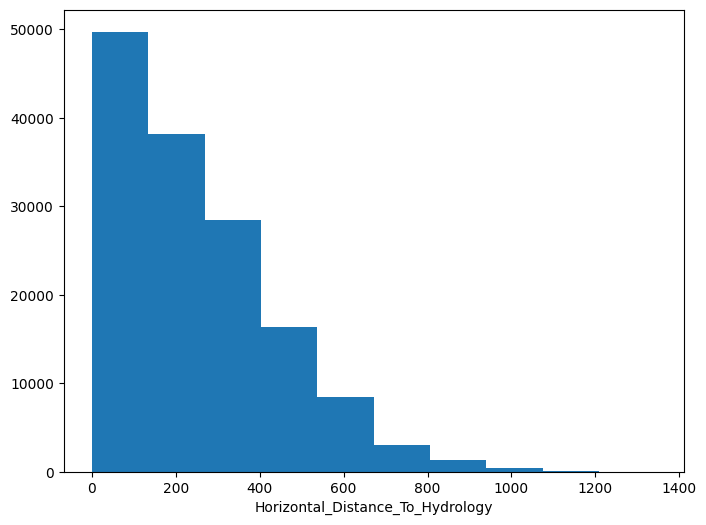

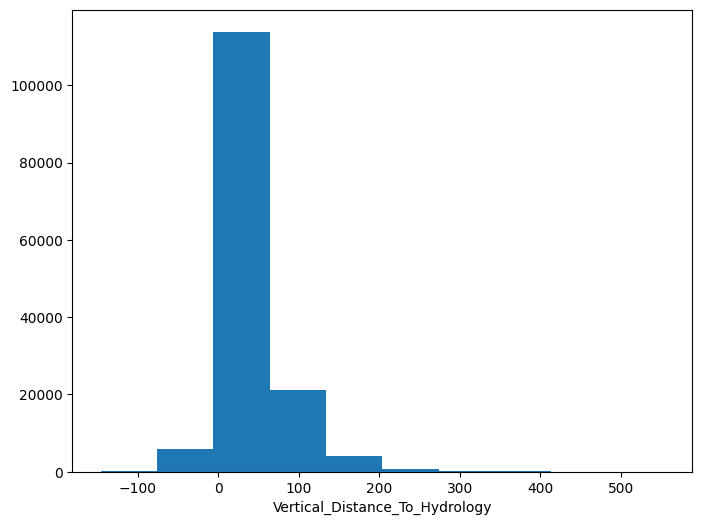

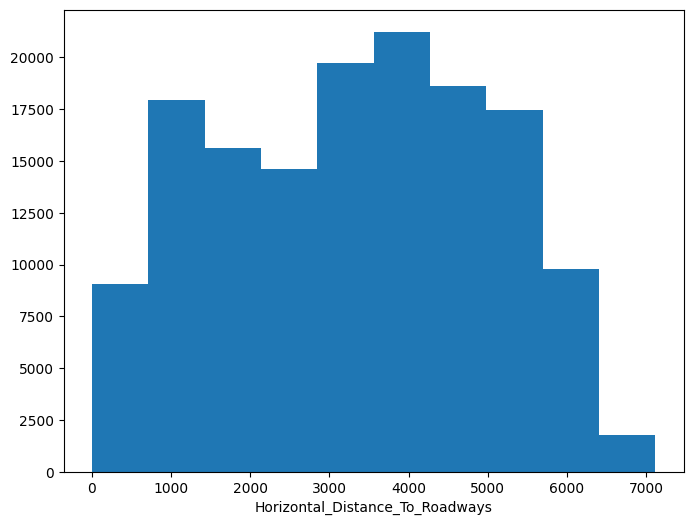

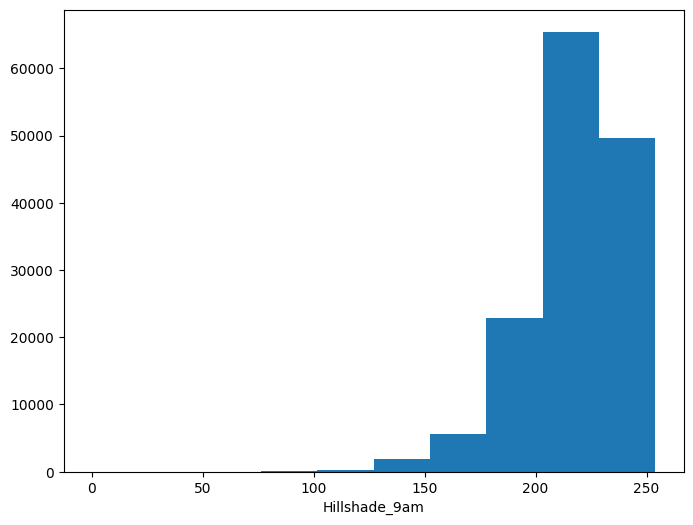

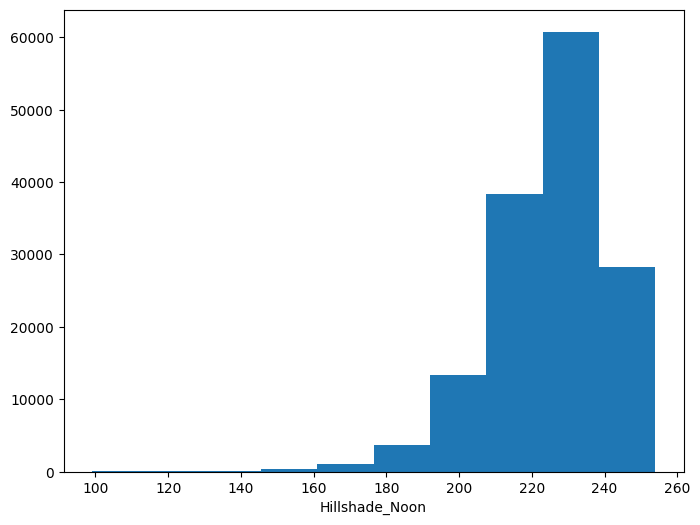

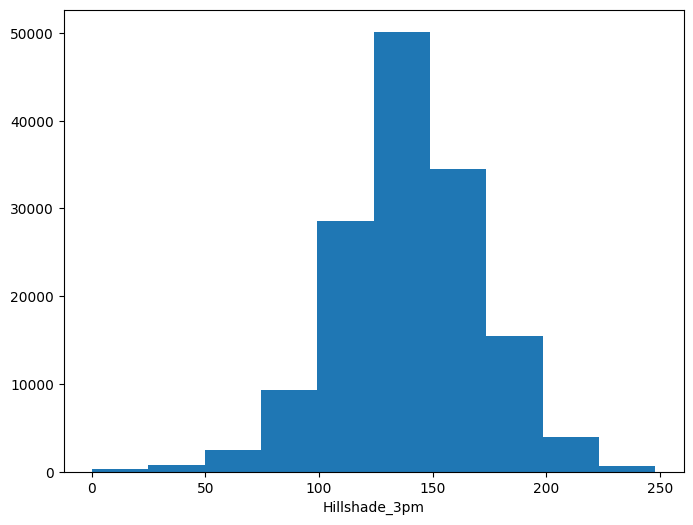

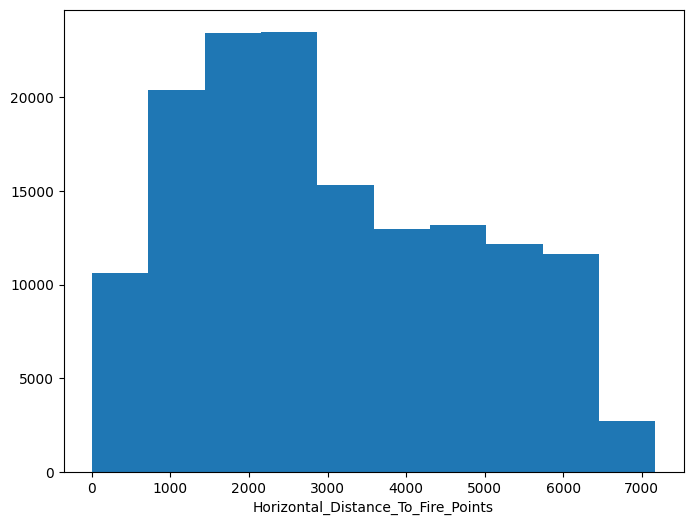

In [7]:
for i in non_bin:
    plt.figure(figsize=(8,6))
    plt.hist(df[i])
    plt.xlabel(i)

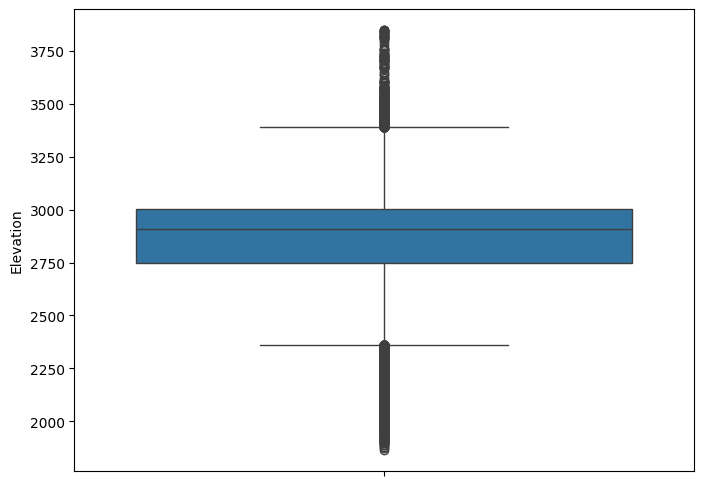

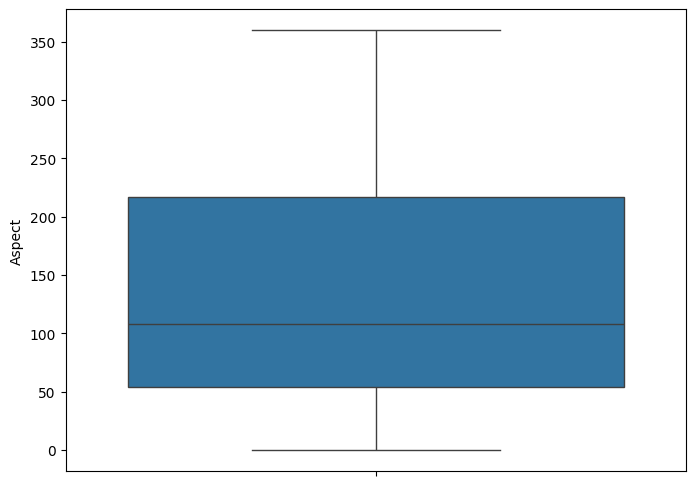

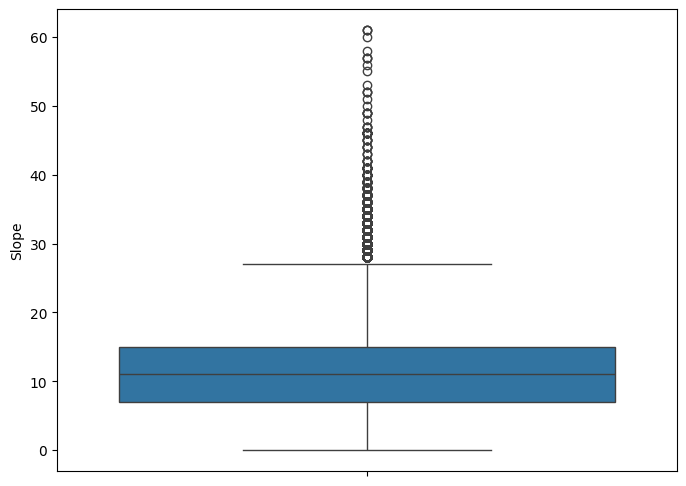

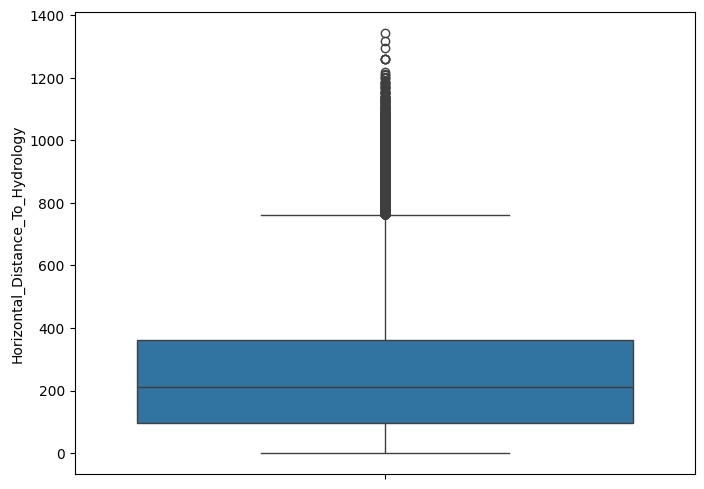

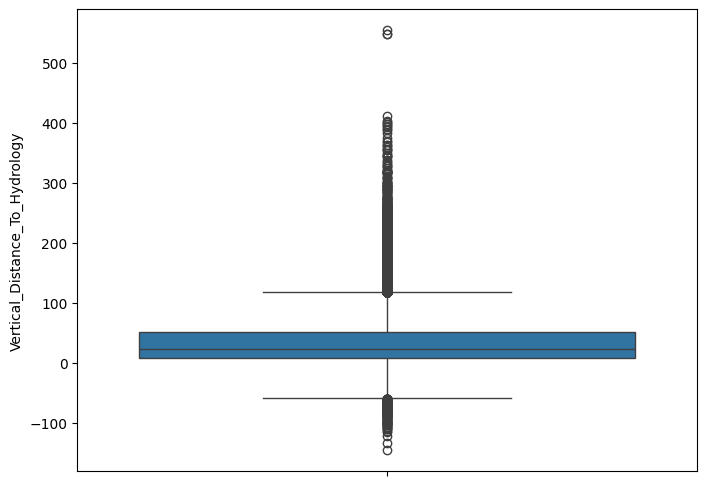

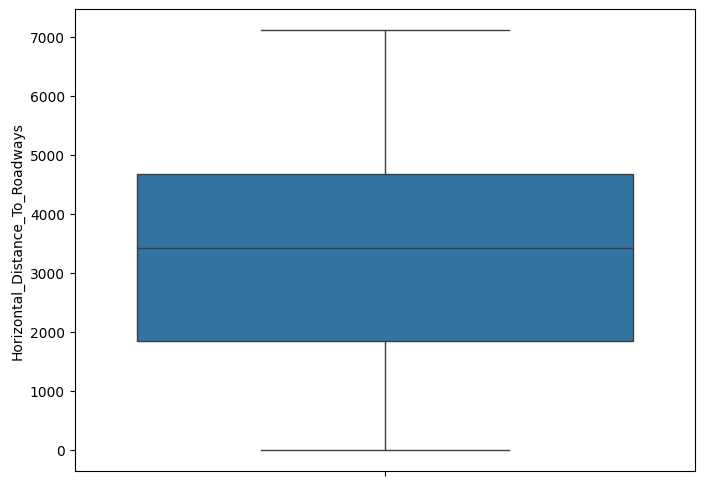

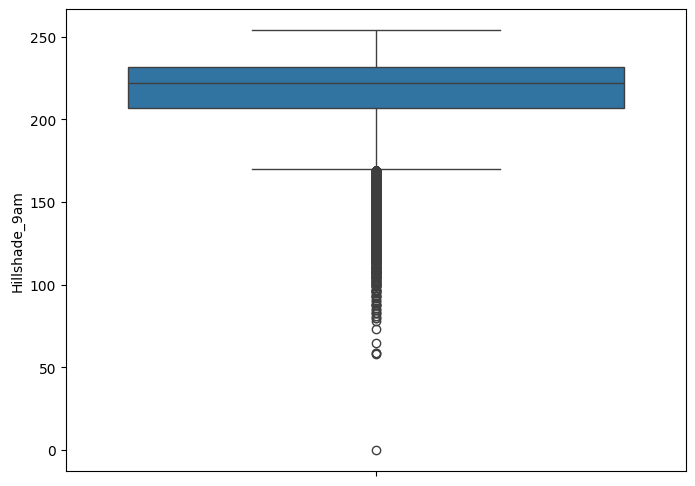

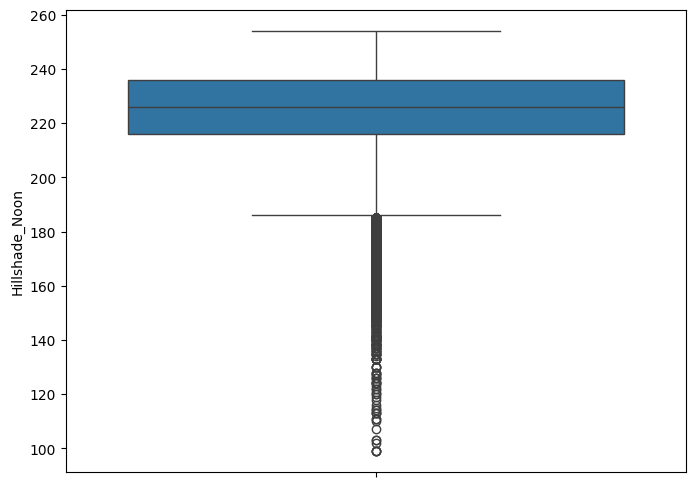

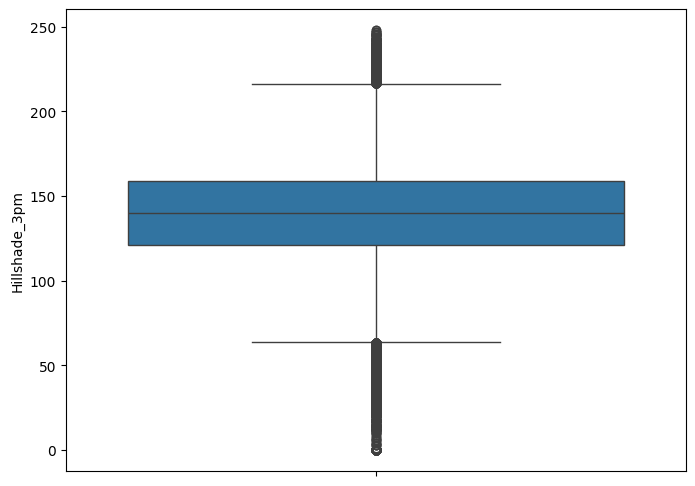

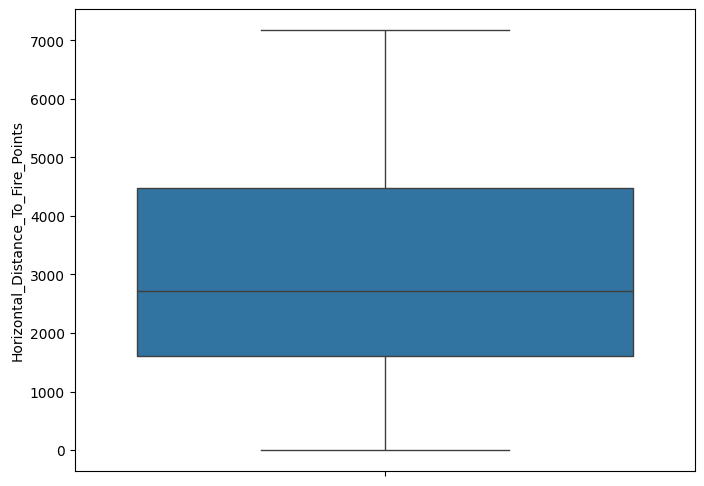

In [8]:
for i in non_bin:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df,y=i)
    plt.ylabel(i)

- Features that have outliers
    - Elevation
    - Slope
    - Horizontal_Distance_To_Hydrology
    - Vertical_Distance_To_Hydrology
    - Hillshade_9am
    - Hillshade_Noon
    - Hillshade_3pm
       

In the Hill Shade columns the values are bounded between 0 to 255.
Values near 0 or 255 might look like outliers.

<Axes: ylabel='Elevation'>

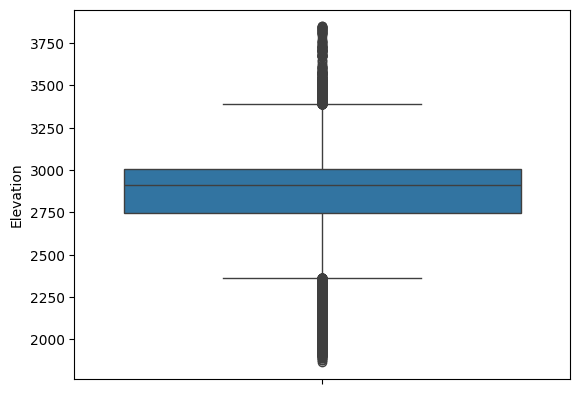

In [9]:
sns.boxplot(y='Elevation', data=df)

<Axes: xlabel='Tv', ylabel='Elevation'>

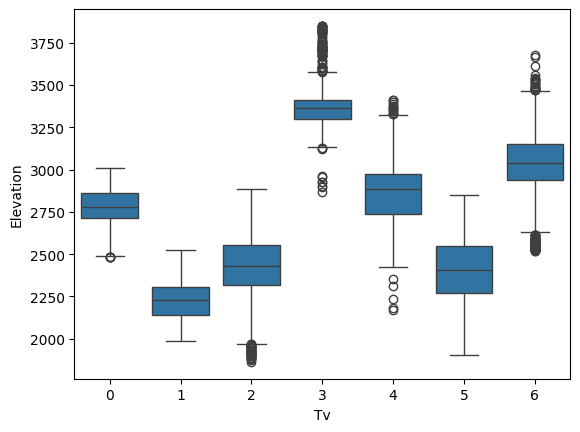

In [10]:
sns.boxplot(x='Tv', y='Elevation', data=df)

<Axes: xlabel='Elevation', ylabel='Count'>

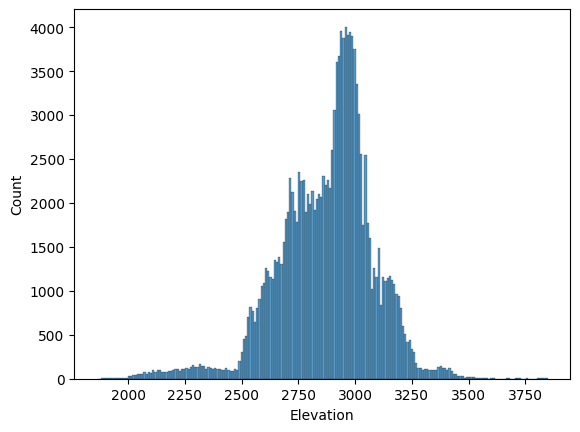

In [11]:
sns.histplot(x='Elevation', data=df)

2361.5 3389.5


<Axes: xlabel='Tv', ylabel='Elevation'>

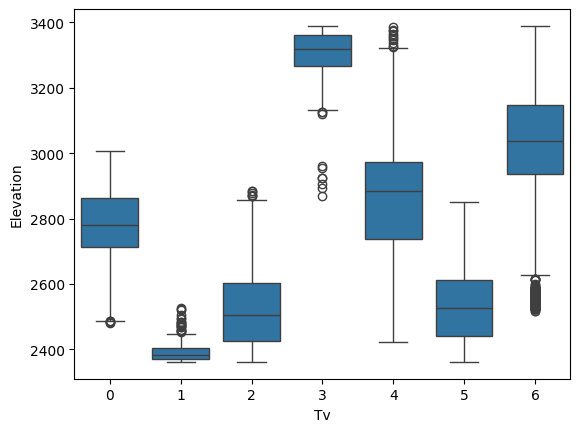

In [12]:
Q1 = df['Elevation'].quantile(0.25)
Q3 = df['Elevation'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)
df_cleaned = df[(df['Elevation'] >= lower_bound) & (df['Elevation'] <= upper_bound)]
sns.boxplot(x='Tv', y='Elevation', data=df_cleaned)

<Axes: xlabel='Elevation', ylabel='Count'>

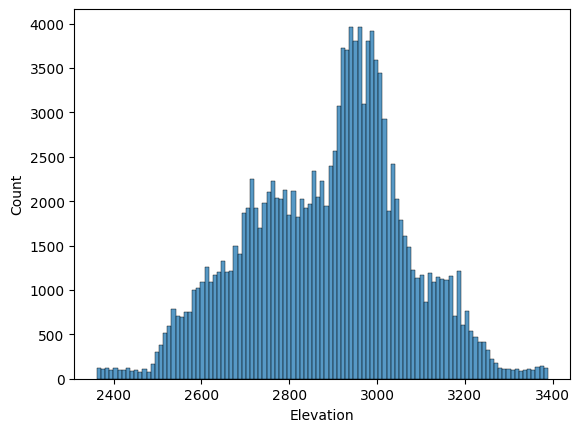

In [13]:
sns.histplot(x='Elevation', data=df_cleaned)

<Axes: ylabel='Elevation'>

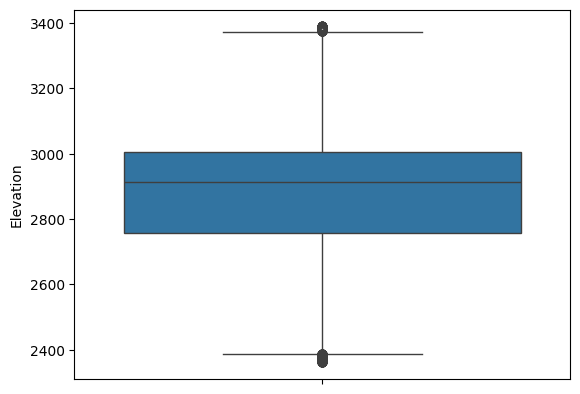

In [14]:
sns.boxplot(y='Elevation', data=df_cleaned)

<Axes: ylabel='Slope'>

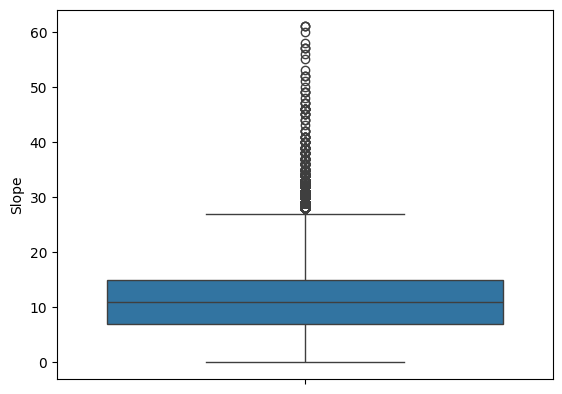

In [15]:
sns.boxplot(y='Slope', data=df_cleaned)

<Axes: xlabel='Slope', ylabel='Count'>

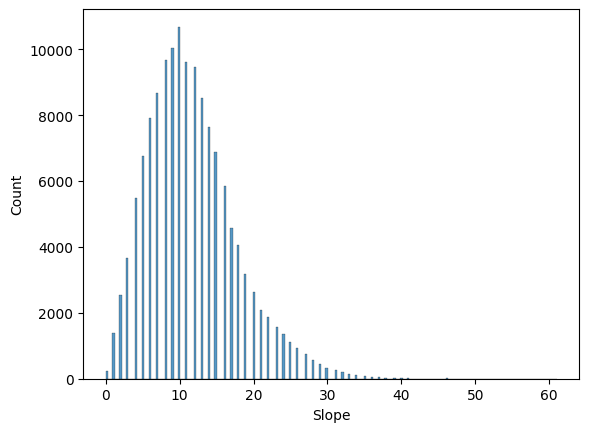

In [16]:
sns.histplot(x='Slope', data=df_cleaned)

-5.0 27.0


<Axes: ylabel='Slope'>

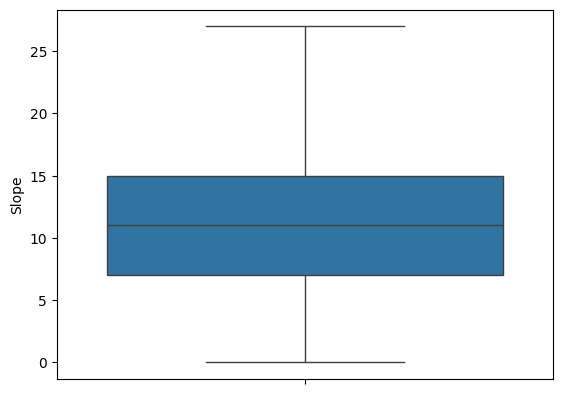

In [17]:
Q1 = df_cleaned['Slope'].quantile(0.25)
Q3 = df_cleaned['Slope'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)
df_cleaned = df_cleaned[(df_cleaned['Slope'] >= lower_bound) & (df_cleaned['Slope'] <= upper_bound)]
sns.boxplot(y='Slope', data=df_cleaned)

<Axes: xlabel='Slope', ylabel='Count'>

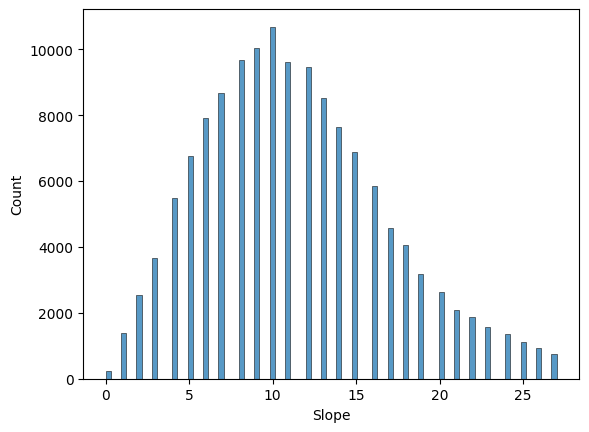

In [18]:
sns.histplot(x='Slope', data=df_cleaned)

In [19]:
print(f"{100 - ((139106 / rows) * 100):.2f}% of the data lost due to outliers")


4.65% of the data lost due to outliers


In [20]:
df.columns
columns_to_keep=['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Tv']

<Axes: >

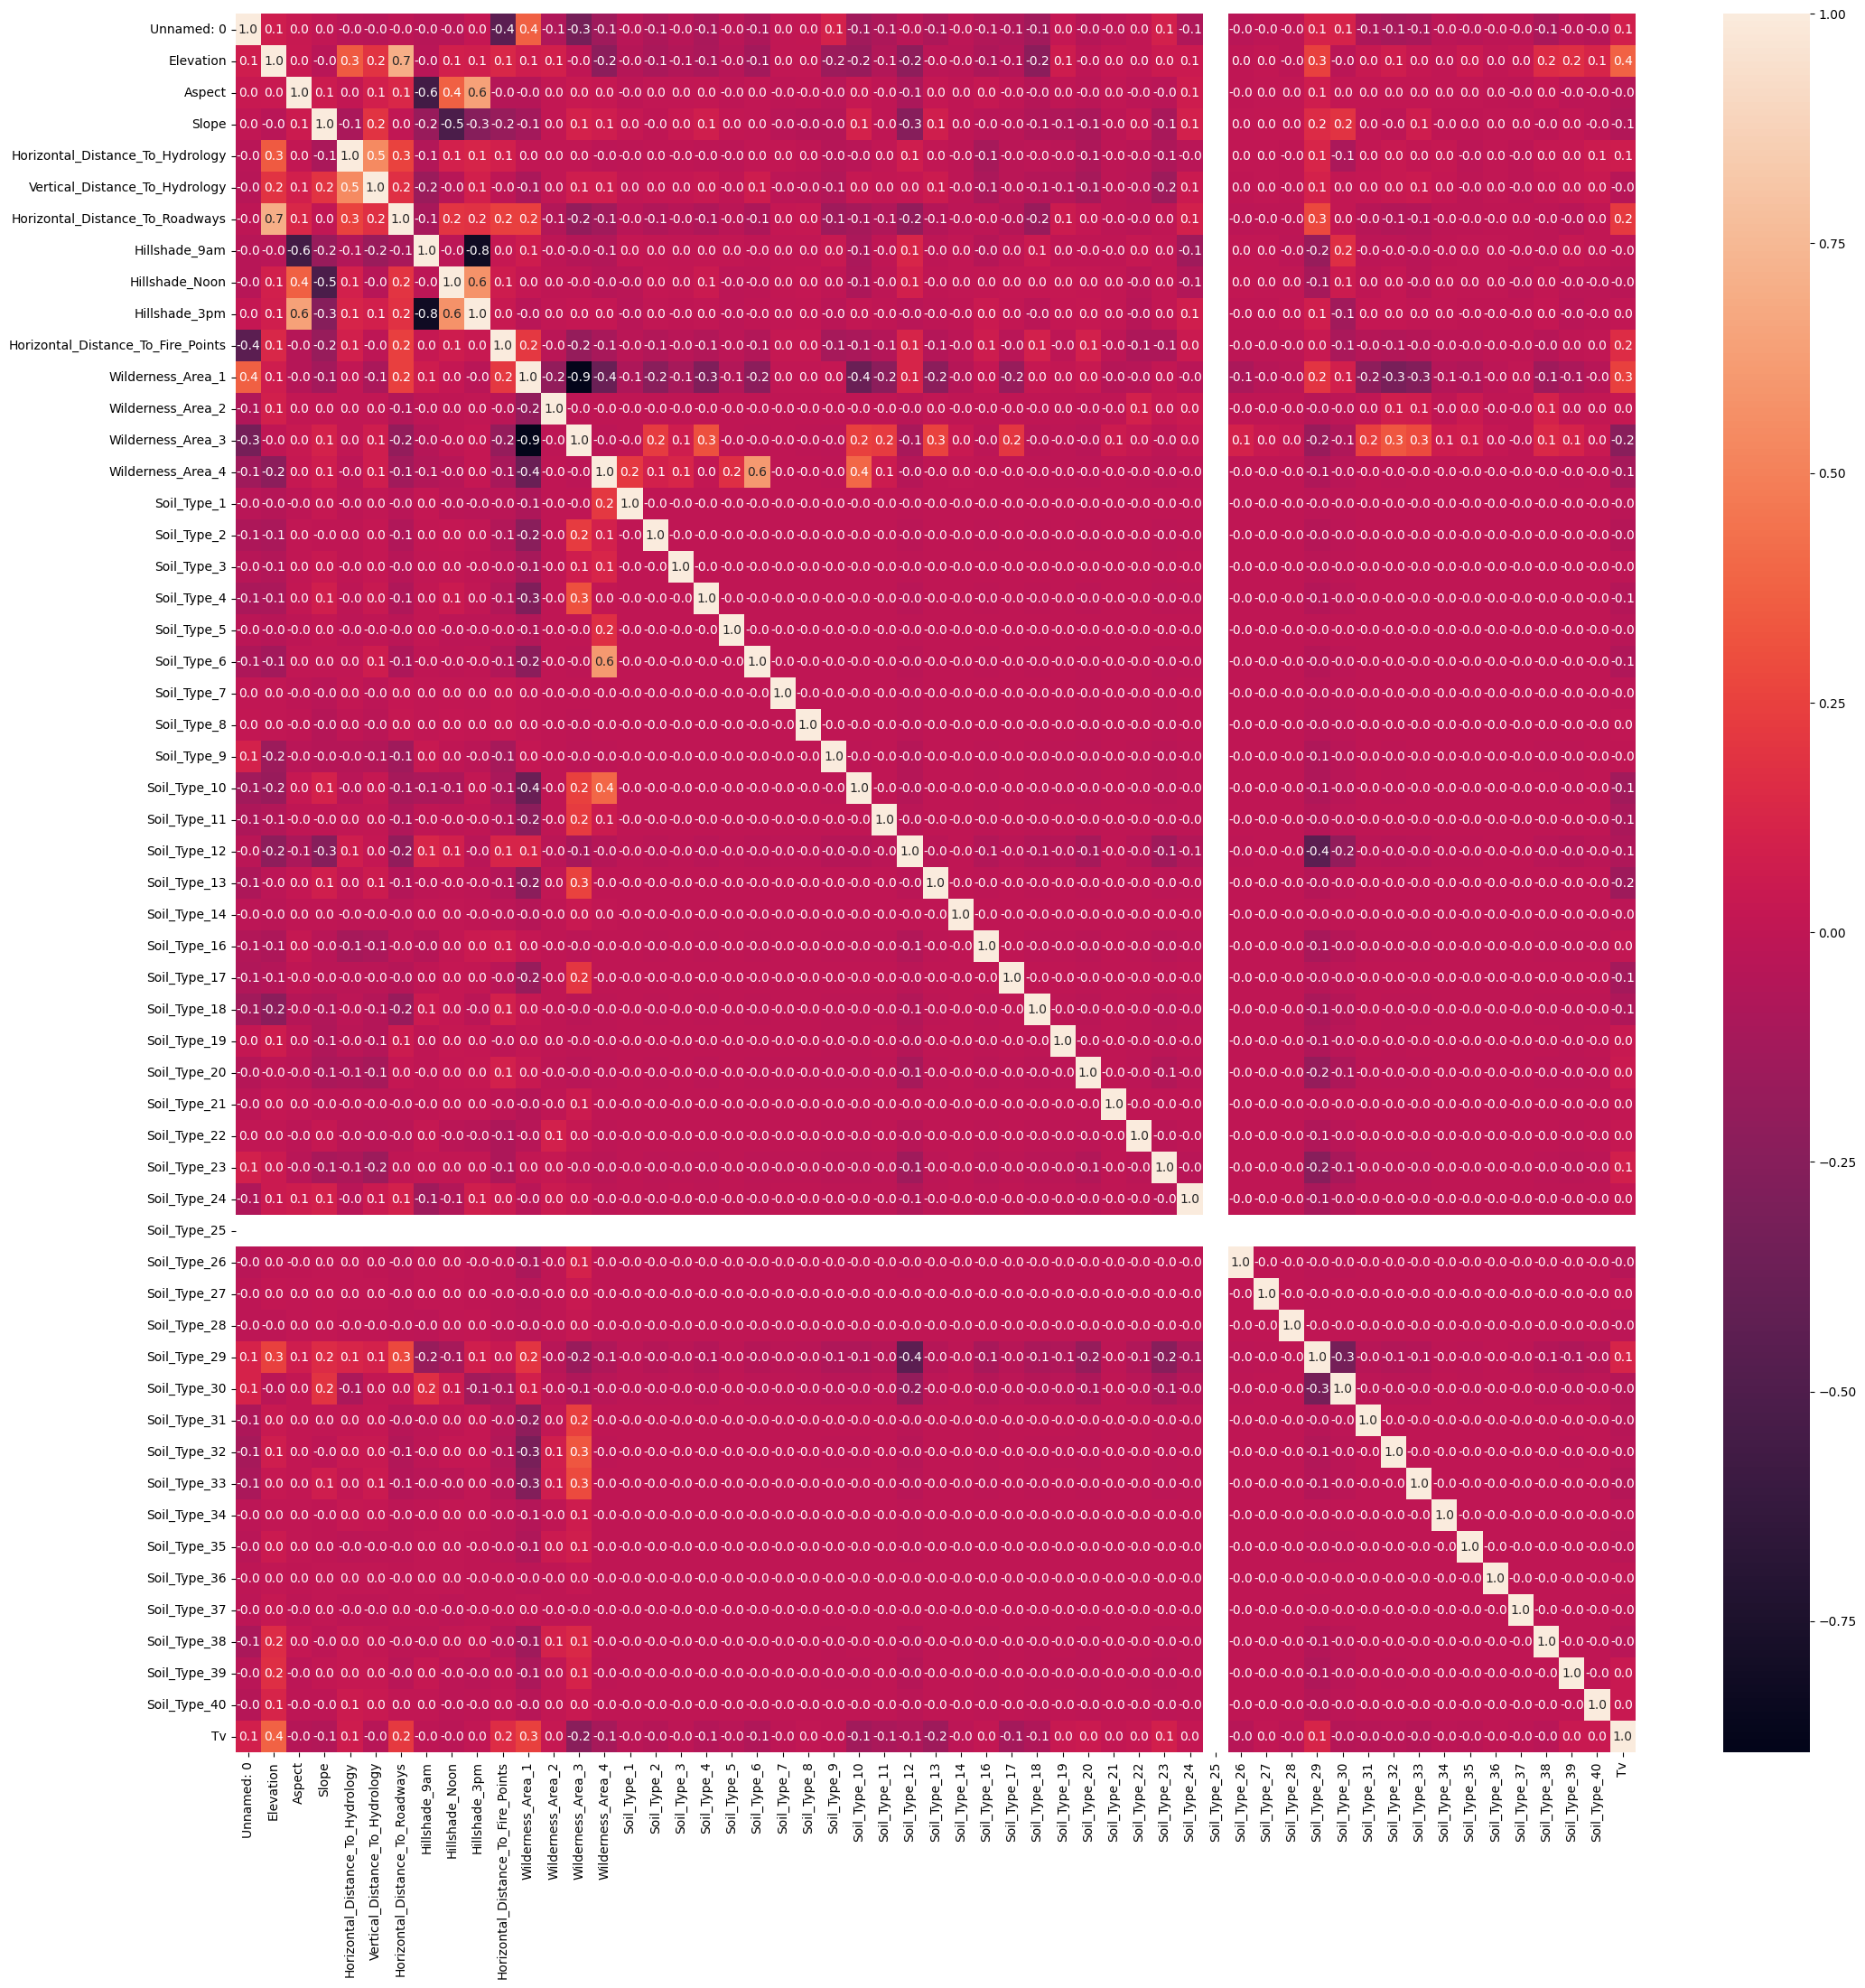

In [21]:
corr_matrix=df_cleaned.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix,annot=True,fmt=".1f")

In [22]:
corr_pairs=corr_matrix.stack().reset_index()
corr_pairs.columns=['F1','F2','Corr']

# Remove self-correlations (Feature1 == Feature2)
corr_pairs = corr_pairs[corr_pairs['F1'] != corr_pairs['F2']]
def categorize_corr(value):
    if 0.6 < value <= 1:
        return 'Strong Positive'
    elif 0.3 <= value <= 0.6:
        return 'Moderate Positive'
    elif -0.6 <= value <= -0.4:
        return 'Moderate Negative'
    elif -1 <= value < -0.6:
        return 'Strong Negative'
    else:
        return None

corr_pairs['Corr']=corr_pairs['Corr'].round(2)
corr_pairs['Category'] = corr_pairs['Corr'].apply(categorize_corr)

#Keep only categorized correlations
corr_pairs = corr_pairs[corr_pairs['Category'].notna()]

corr_pairs = corr_pairs.reindex(corr_pairs['Corr'].abs().sort_values(ascending=False).index)
corr_pairs['Feature_Pair'] = corr_pairs['F1'] + ' - ' + corr_pairs['F2']
final_corr = corr_pairs[['Feature_Pair', 'Corr', 'Category']]

In [23]:
final_corr.sort_values(by='Corr',ascending=False)

Feature_Pair  Corr  \
60          Elevation - Horizontal_Distance_To_Roadways  0.70   
325         Horizontal_Distance_To_Roadways - Elevation  0.70   
117                              Aspect - Hillshade_3pm  0.64   
488                              Hillshade_3pm - Aspect  0.64   
1094                    Soil_Type_6 - Wilderness_Area_4  0.61   
776                     Wilderness_Area_4 - Soil_Type_6  0.61   
494                      Hillshade_3pm - Hillshade_Noon  0.58   
441                      Hillshade_Noon - Hillshade_3pm  0.58   
274   Vertical_Distance_To_Hydrology - Horizontal_Di...  0.54   
221   Horizontal_Distance_To_Hydrology - Vertical_Di...  0.54   
1310                   Soil_Type_10 - Wilderness_Area_4  0.40   
780                    Wilderness_Area_4 - Soil_Type_10  0.40   
2863                                     Tv - Elevation  0.37   
434                             Hillshade_Noon - Aspect  0.37   
107                                      Elevation - Tv  0.37   
116                             Aspect - Hillshade_Noon  0.37   
11                       Unnamed: 0 - Wilderness_Area_1  0.36   
594                      Wilderness_Area_1 - Unnamed: 0  0.36   
58         Elevation - Horizontal_Distance_To_Hydrology  0.35   
217        Horizontal_Distance_To_Hydrology - Elevation  0.35   
2389                   Soil_Type_32 - Wilderness_Area_3  0.33   
746                    Wilderness_Area_3 - Soil_Type_32  0.33   
720                     Wilderness_Area_3 - Soil_Type_4  0.31   
985                     Soil_Type_4 - Wilderness_Area_3  0.31   
540     Horizontal_Distance_To_Fire_Points - Unnamed: 0 -0.44   
10      Unnamed: 0 - Horizontal_Distance_To_Fire_Points -0.44   
1445                        Soil_Type_12 - Soil_Type_29 -0.45   
2240                        Soil_Type_29 - Soil_Type_12 -0.45   
170                              Slope - Hillshade_Noon -0.52   
435                              Hillshade_Noon - Slope -0.52   
380                              Hillshade_9am - Aspect -0.56   
115                              Aspect - Hillshade_9am -0.56   
387                       Hillshade_9am - Hillshade_3pm -0.82   
493                       Hillshade_3pm - Hillshade_9am -0.82   
607               Wilderness_Area_1 - Wilderness_Area_3 -0.89   
713               Wilderness_Area_3 - Wilderness_Area_1 -0.89   

               Category  
60      Strong Positive  
325     Strong Positive  
117     Strong Positive  
488     Strong Positive  
1094    Strong Positive  
776     Strong Positive  
494   Moderate Positive  
441   Moderate Positive  
274   Moderate Positive  
221   Moderate Positive  
1310  Moderate Positive  
780   Moderate Positive  
2863  Moderate Positive  
434   Moderate Positive  
107   Moderate Positive  
116   Moderate Positive  
11    Moderate Positive  
594   Moderate Positive  
58    Moderate Positive  
217   Moderate Positive  
2389  Moderate Positive  
746   Moderate Positive  
720   Moderate Positive  
985   Moderate Positive  
540   Moderate Negative  
10    Moderate Negative  
1445  Moderate Negative  
2240  Moderate Negative  
170   Moderate Negative  
435   Moderate Negative  
380   Moderate Negative  
115   Moderate Negative  
387     Strong Negative  
493     Strong Negative  
607     Strong Negative  
713     Strong Negative

In [24]:
'''
Strong Positive Correlation:
    Elevation and Horizontal_Distance_To_Roadways = 0.70
    Aspect and HillShade_3PM = 0.64
    Wilderness_Area_4 - Soil_Type_6 = 0.61

Strong Negative Correlation:
    Wilderness_Area_3 - Wilderness_Area_1 = -0.89
    Hillshade_3pm - Hillshade_9am = -0.82

Moderate Postive Correlation
    
    Hillshade_Noon - Hillshade_3pm	= 0.58
    Vertical_Distance_To_Hydrology -Horizontal_Distance_To_Hydrology = 0.54
    Soil_Type_10 - Wilderness_Area_4 = 0.40
    Aspect - Hillshade_Noon = 0.37
    Elevation - Tv	= 0.37
    Horizontal_Distance_To_Hydrology - Elevation = 0.35
    Soil_Type_32 - Wilderness_Area_3 = 0.33
    Soil_Type_4 - Wilderness_Area_3	= 0.31

Moderate Negative Correlation
    Soil_Type_29 - Soil_Type_12	= -0.45
    Hillshade_Noon - Slope	= -0.52
    Hillshade_9am - Aspect	= -0.56
    '''

'\nStrong Positive Correlation:\n    Elevation and Horizontal_Distance_To_Roadways = 0.70\n    Aspect and HillShade_3PM = 0.64\n    Wilderness_Area_4 - Soil_Type_6 = 0.61\n\nStrong Negative Correlation:\n    Wilderness_Area_3 - Wilderness_Area_1 = -0.89\n    Hillshade_3pm - Hillshade_9am = -0.82\n\nModerate Postive Correlation\n    \n    Hillshade_Noon - Hillshade_3pm\t= 0.58\n    Vertical_Distance_To_Hydrology -Horizontal_Distance_To_Hydrology = 0.54\n    Soil_Type_10 - Wilderness_Area_4 = 0.40\n    Aspect - Hillshade_Noon = 0.37\n    Elevation - Tv\t= 0.37\n    Horizontal_Distance_To_Hydrology - Elevation = 0.35\n    Soil_Type_32 - Wilderness_Area_3 = 0.33\n    Soil_Type_4 - Wilderness_Area_3\t= 0.31\n\nModerate Negative Correlation\n    Soil_Type_29 - Soil_Type_12\t= -0.45\n    Hillshade_Noon - Slope\t= -0.52\n    Hillshade_9am - Aspect\t= -0.56\n    '

In [25]:
num_cols=df_cleaned[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','Tv']]

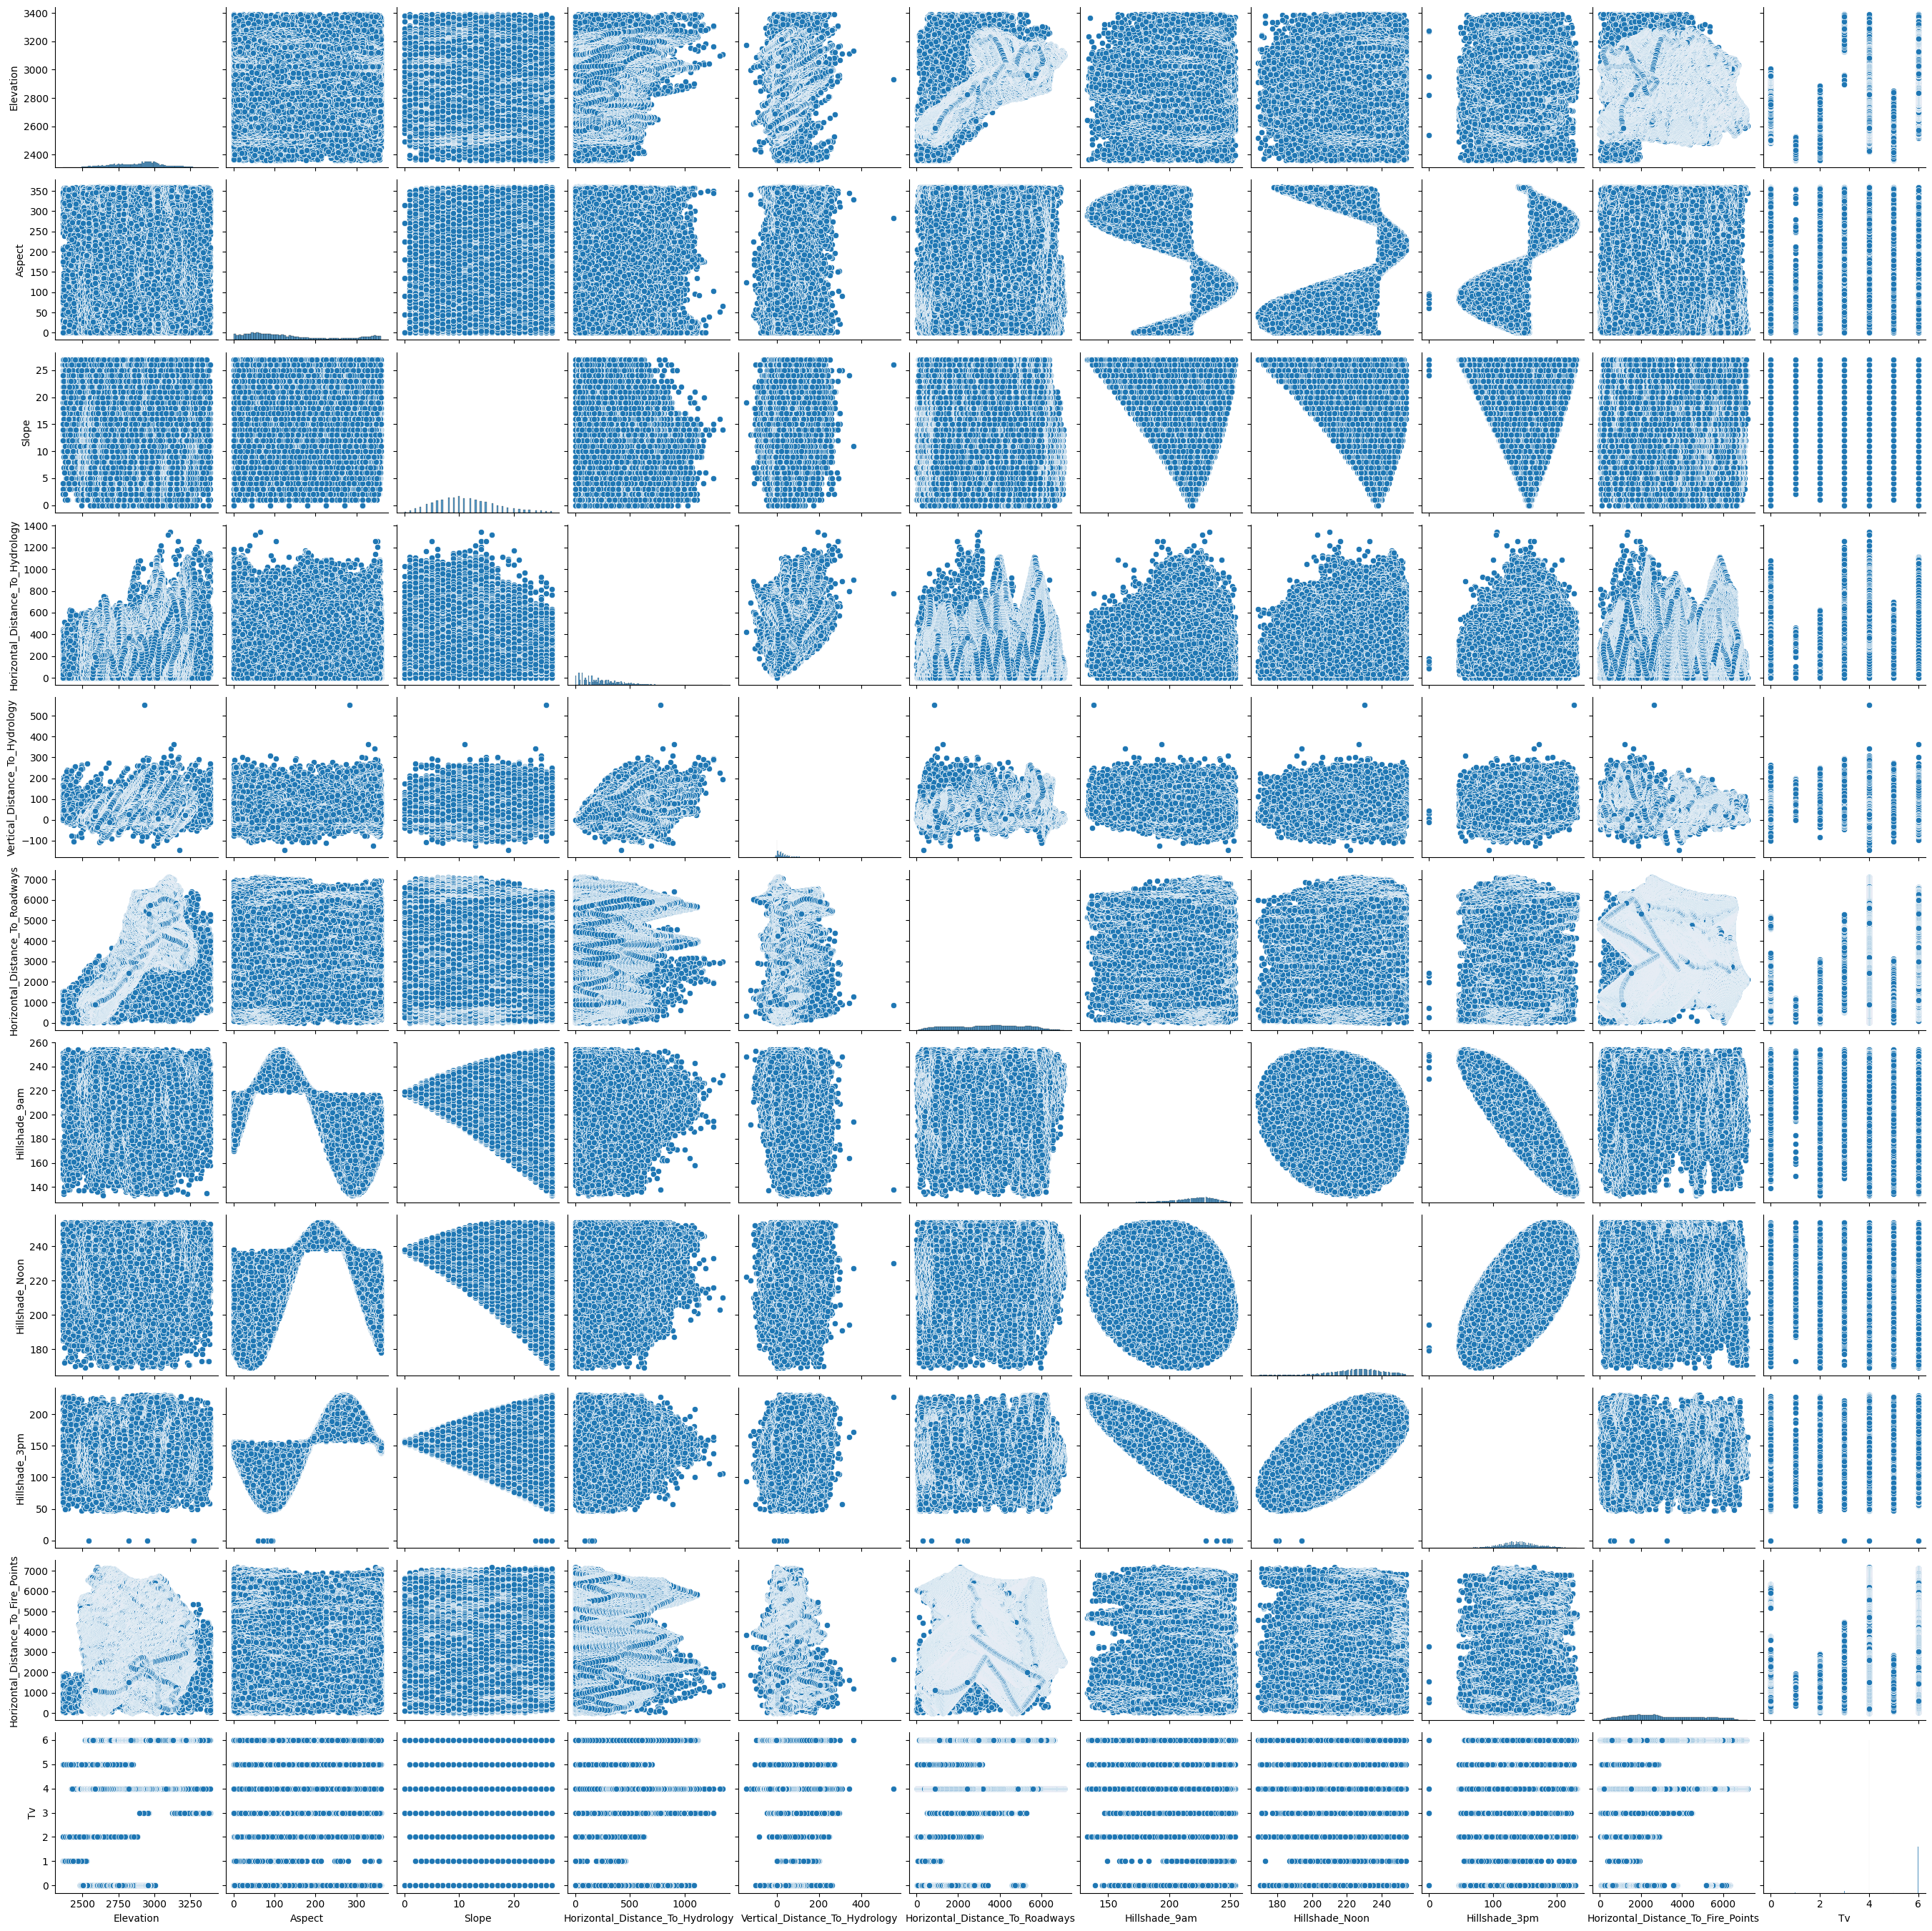

In [26]:
sns.pairplot(num_cols)

### Identifying Skewed data

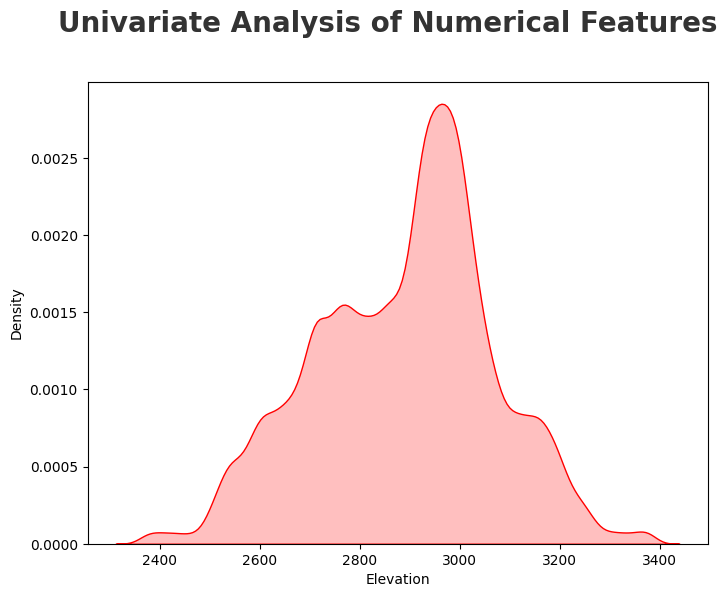

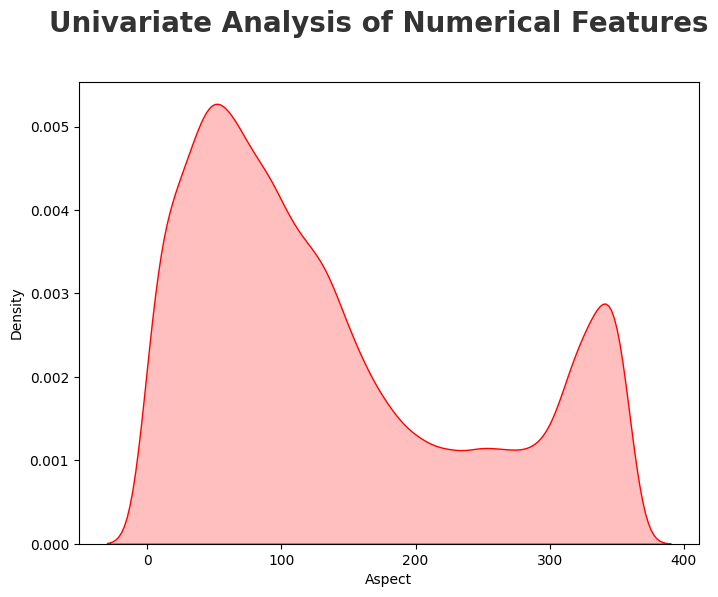

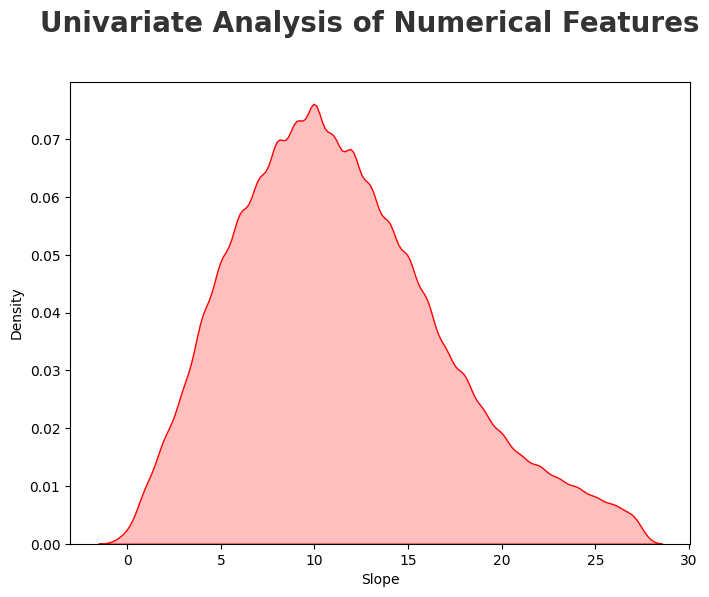

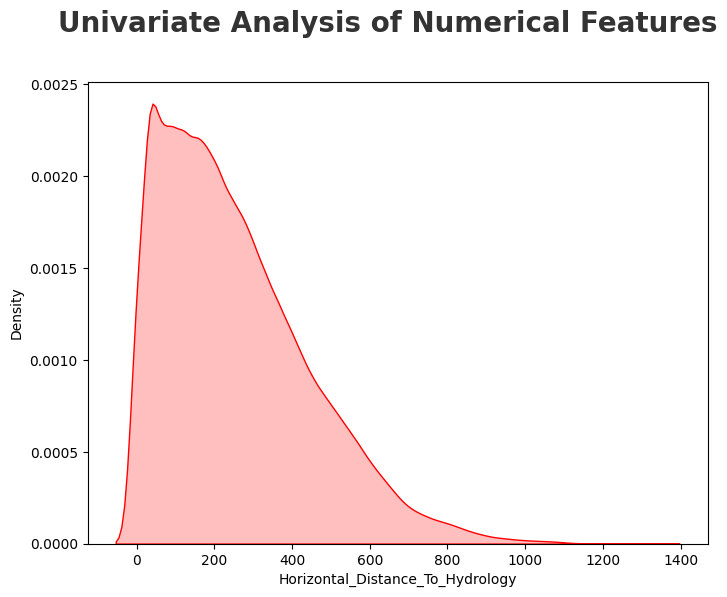

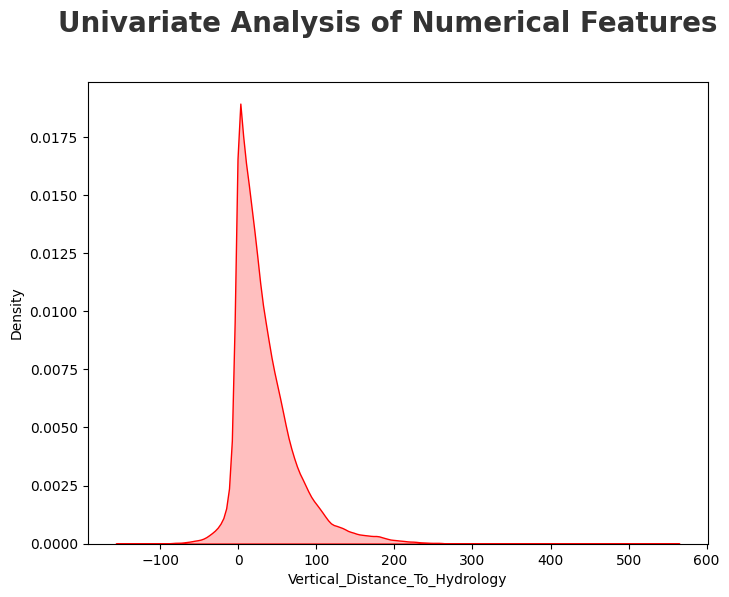

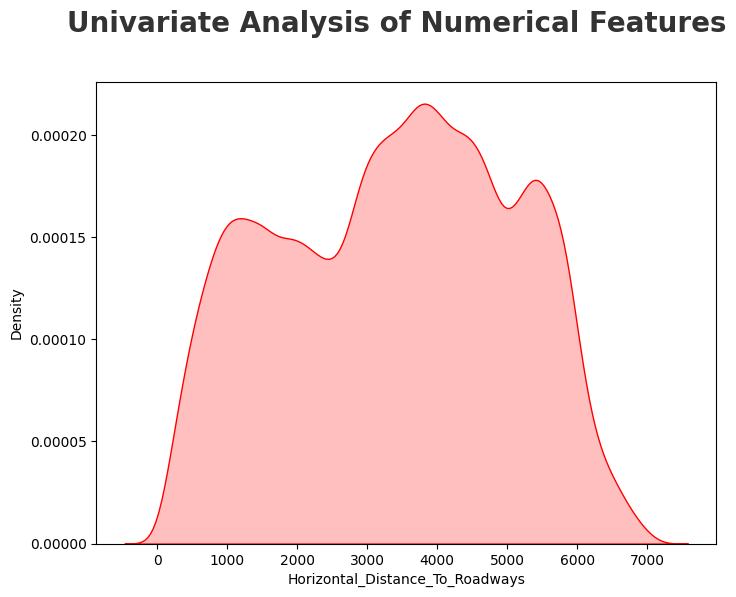

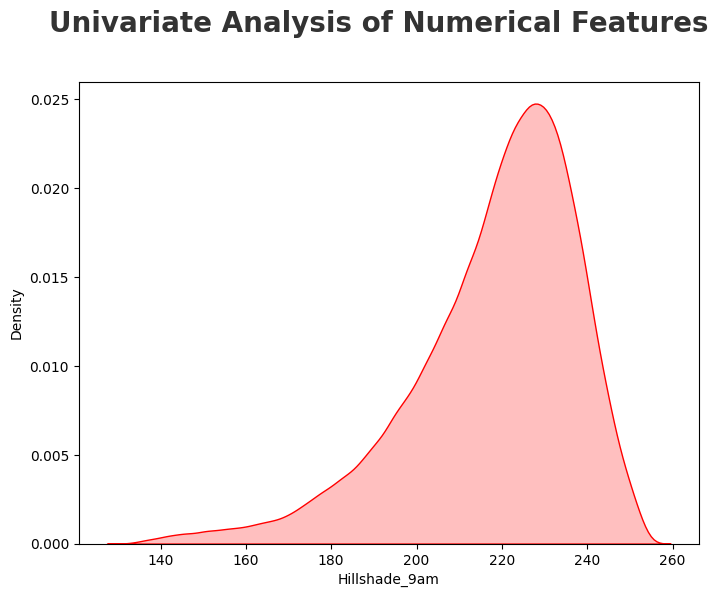

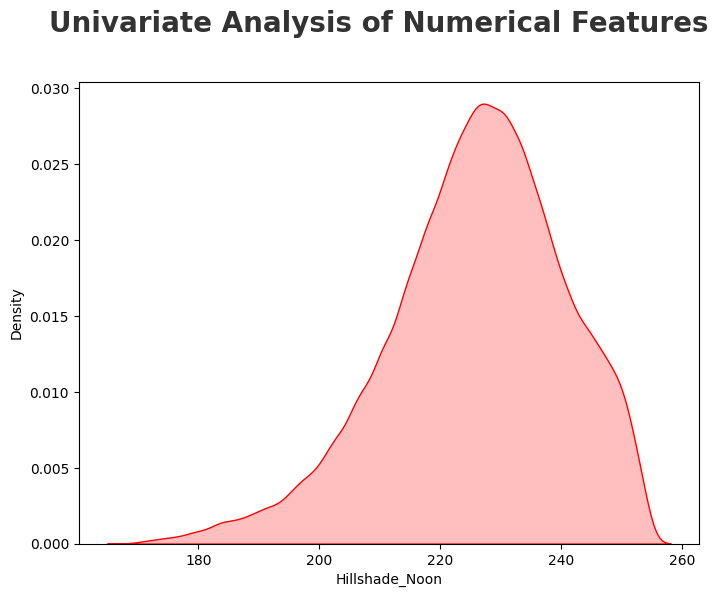

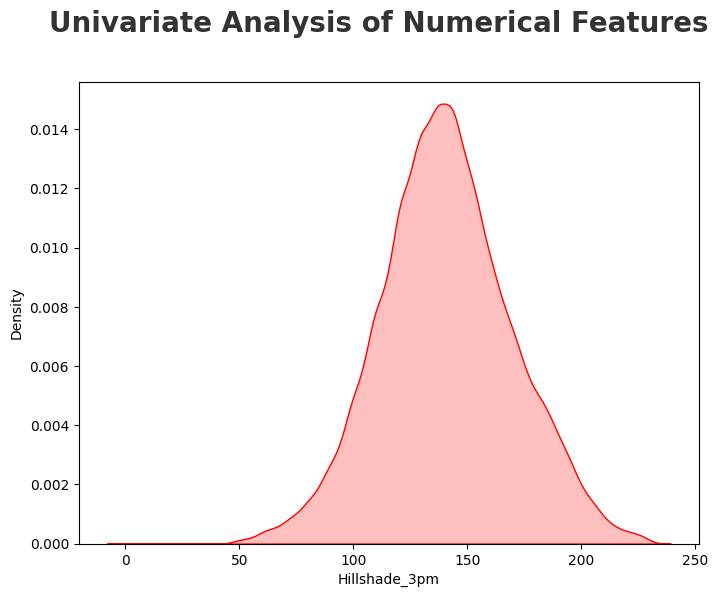

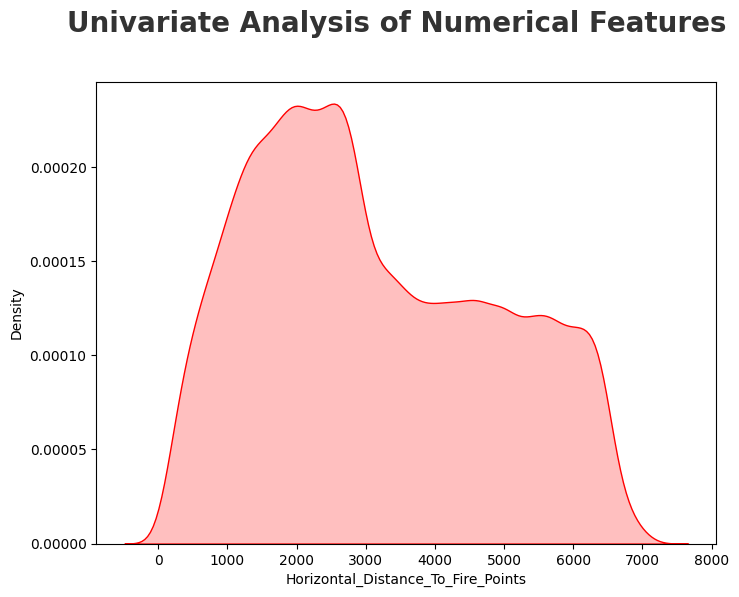

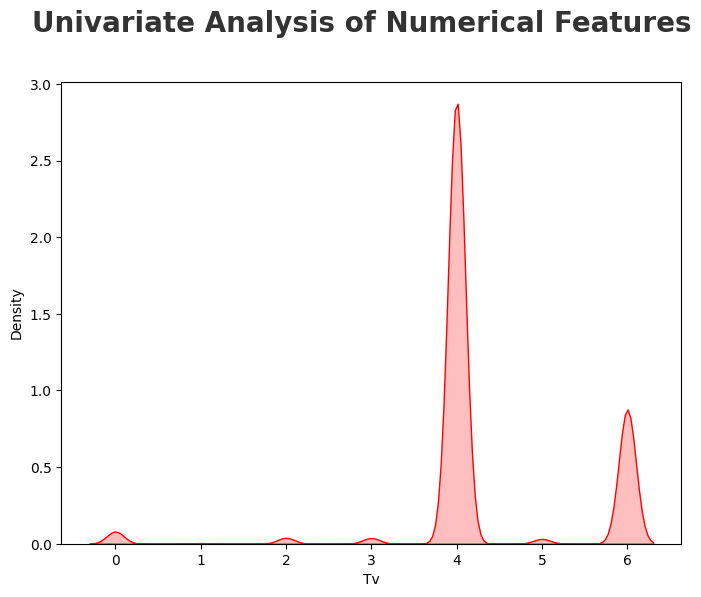

In [27]:
## Proportion of count data on numerical columns

for i in num_cols.columns:
    plt.figure(figsize=(8, 6))
    plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
    sns.kdeplot(x=num_cols[i],shade=True, color='r')
    plt.xlabel(i)

In [28]:
for i in num_cols.columns:
    print(i,num_cols[i].skew())

Elevation -0.18063259214906072
Aspect 0.7076637226590321
Slope 0.5023581189251121
Horizontal_Distance_To_Hydrology 0.9393673573577066
Vertical_Distance_To_Hydrology 1.6653033619827415
Horizontal_Distance_To_Roadways -0.09414495539633712
Hillshade_9am -1.0523428728168704
Hillshade_Noon -0.5249105118921659
Hillshade_3pm 0.07491060265083284
Horizontal_Distance_To_Fire_Points 0.3403645153119364
Tv -0.6706399754274857


- Symmetric distribution: Skewness is close to 0. A value between -0.5 and +0.5 is often considered approximately symmetric.
- Right-skewed (positive skew): The tail on the right is longer, and the majority of data points are on the left.
- Left-skewed (negative skew): The tail on the left is longer, and the majority of data points are on the right.
- Highly skewed: Values greater than +1 or less than -1 indicate a high degree of skewness.
- Moderately skewed: Values between +0.5 and +1 or -0.5 and -1 indicate moderate skewness.
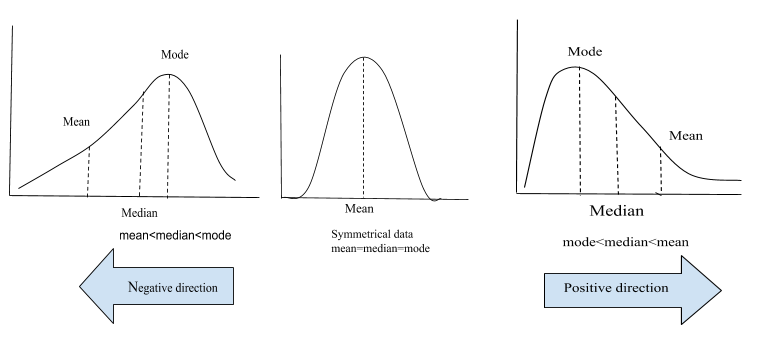

In [29]:
for i in num_cols.columns:
    print(i,num_cols[i].kurtosis())

Elevation -0.2858675572887748
Aspect -0.7834723035485607
Slope -0.13160158626653873
Horizontal_Distance_To_Hydrology 0.7050504084103899
Vertical_Distance_To_Hydrology 4.390798508518797
Horizontal_Distance_To_Roadways -1.0190413318194318
Hillshade_9am 1.281665336193242
Hillshade_Noon 0.2451382664141799
Hillshade_3pm 0.03387862337446146
Horizontal_Distance_To_Fire_Points -0.9757196377417232
Tv 3.9043899958576884


- Kurtosis ≈ 0 → roughly normal
- Kurtosis > 3 → heavy tails (leptokurtic)
- Kurtosis < 0 → light tails (platykurtic)

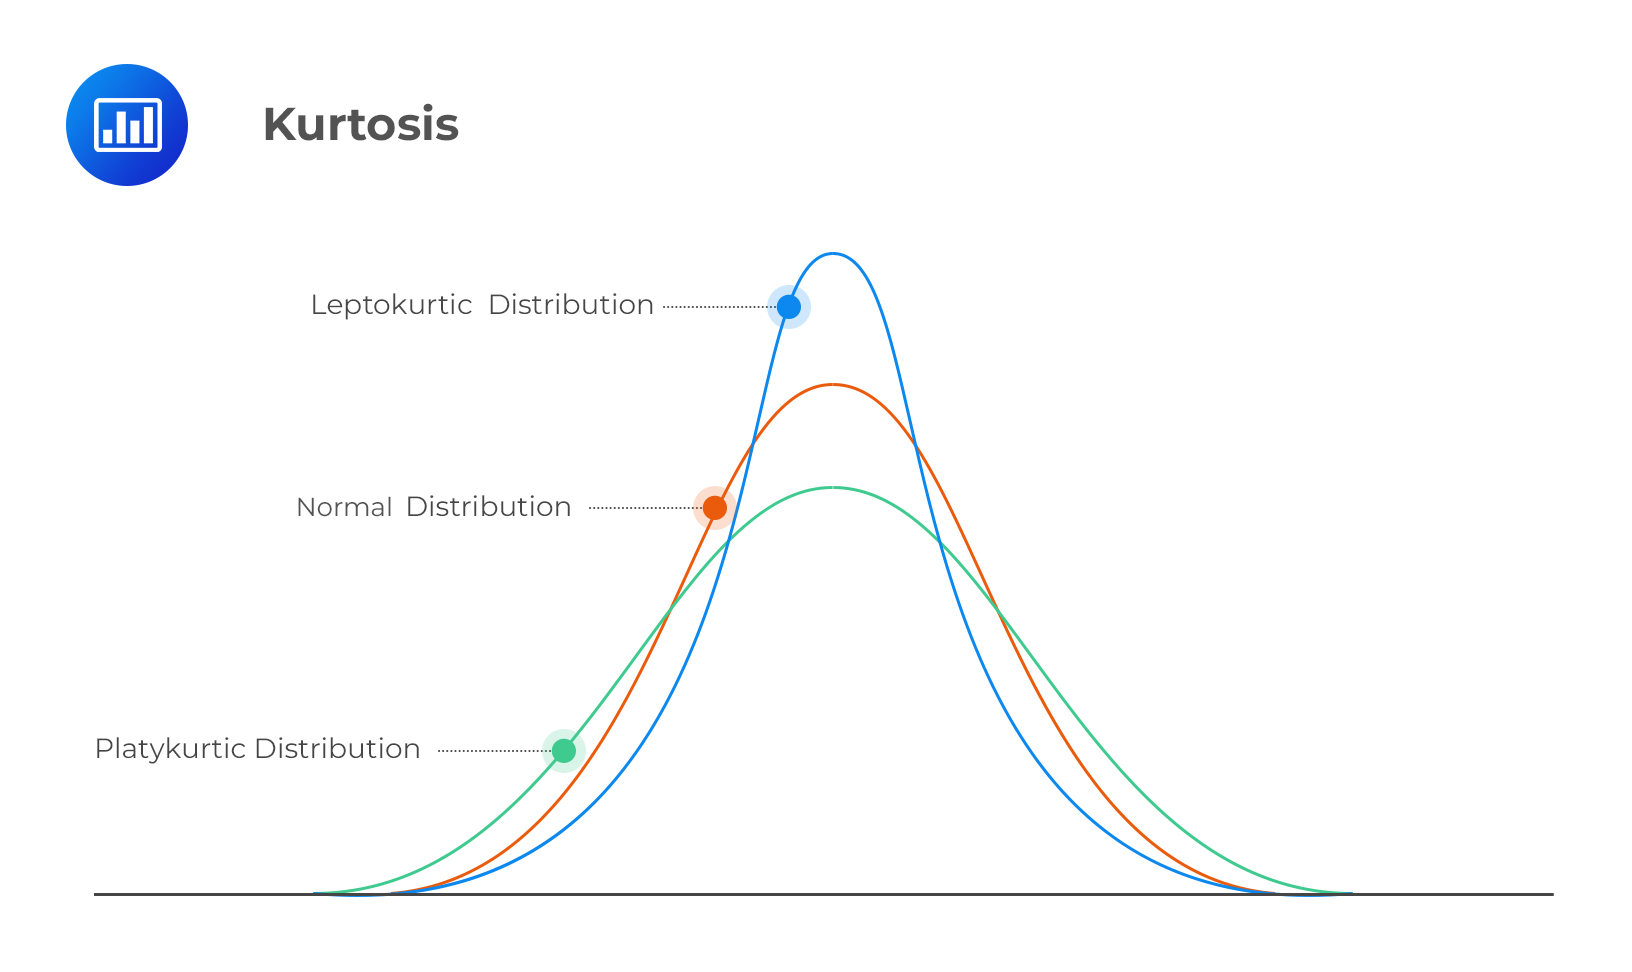

- Vertical_Distance_To_Hydrology is heavily right tailed
- Tv is the target variable which is imbalanced so can be handled during train_test_split

### Handiling Skewness and Kurtosis has it might affect the Logistic Regression Model

In [36]:
df_cleaned['Aspect'].skew()

0.7076637226590318

In [30]:
log_reg=df_cleaned.copy()

In [31]:
log_reg['Aspectr2']=np.sqrt(log_reg['Aspect'])

In [32]:
log_reg['Aspectr2'].skew()

np.float64(0.08050598695267121)

Text(0.5, 0, 'Aspectr2')

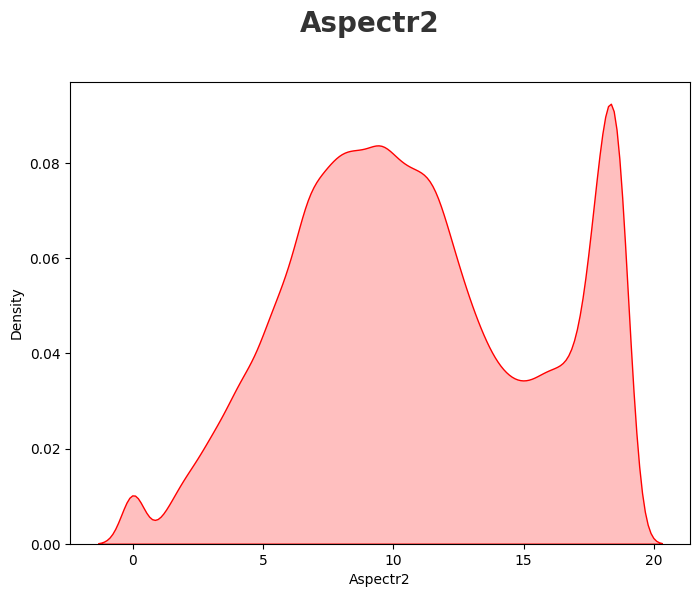

In [33]:
i='Aspectr2'
plt.figure(figsize=(8, 6))
plt.suptitle(i, fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.kdeplot(x=log_reg[i],shade=True, color='r')
plt.xlabel(i)

In [34]:
log_reg[['Aspectr2','Aspect']].head(10)

Aspectr2  Aspect
0   7.141428      51
1   7.483315      56
2  11.789826     139
3  12.449900     155
4   6.708204      45
5  11.489125     132
6   6.708204      45
7   7.000000      49
8   6.708204      45
9   7.681146      59

In [35]:
log_reg.drop('Aspect',axis=1,inplace=True)

Text(0.5, 0, 'Horizontal_Distance_To_Hydrology')

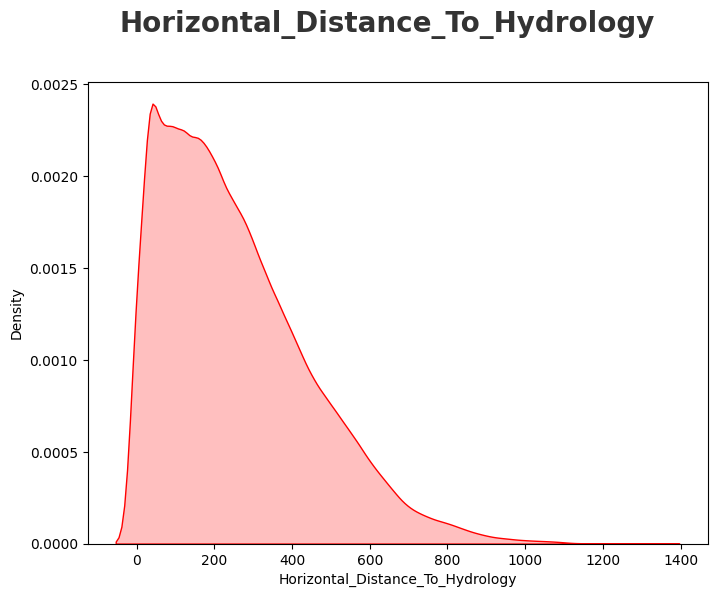

In [38]:
i='Horizontal_Distance_To_Hydrology'
plt.figure(figsize=(8, 6))
plt.suptitle(i, fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.kdeplot(x=log_reg[i],shade=True, color='r')
plt.xlabel(i)

In [37]:
log_reg['Horizontal_Distance_To_Hydrologyr2']=np.sqrt(log_reg['Horizontal_Distance_To_Hydrology'])

In [39]:
print(log_reg['Horizontal_Distance_To_Hydrologyr2'].skew())
print(log_reg['Horizontal_Distance_To_Hydrologyr2'].kurtosis())

-0.13306069520747035
-0.2729989755579476


In [40]:
log_reg[['Horizontal_Distance_To_Hydrologyr2','Horizontal_Distance_To_Hydrology']].head(10)

Horizontal_Distance_To_Hydrologyr2  Horizontal_Distance_To_Hydrology
0                           16.062378                               258
1                           14.560220                               212
2                           16.370706                               268
3                           15.556349                               242
4                           12.369317                               153
5                           17.320508                               300
6                           16.431677                               270
7                           15.297059                               234
8                           15.491933                               240
9                           15.716234                               247

Text(0.5, 0, 'Horizontal_Distance_To_Hydrologyr2')

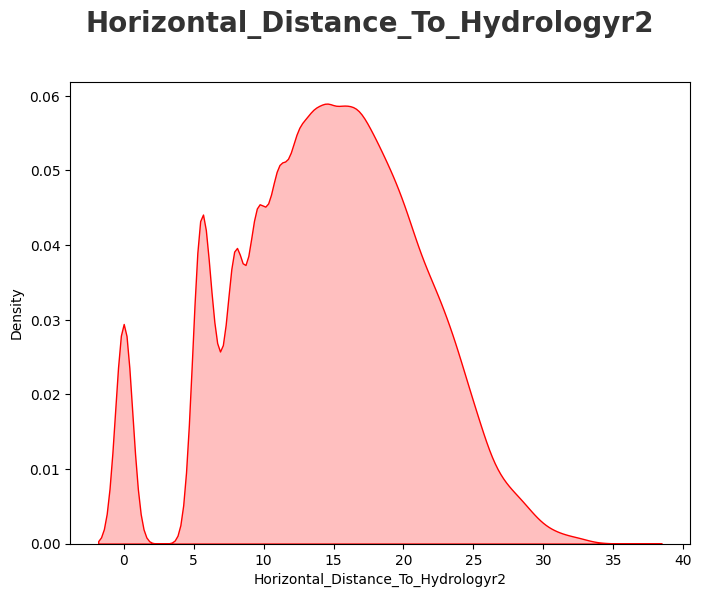

In [41]:
i='Horizontal_Distance_To_Hydrologyr2'
plt.figure(figsize=(8, 6))
plt.suptitle(i, fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.kdeplot(x=log_reg[i],shade=True, color='r')
plt.xlabel(i)

In [42]:
log_reg.drop('Horizontal_Distance_To_Hydrology',axis=1,inplace=True)


Text(0.5, 0, 'Vertical_Distance_To_Hydrology')

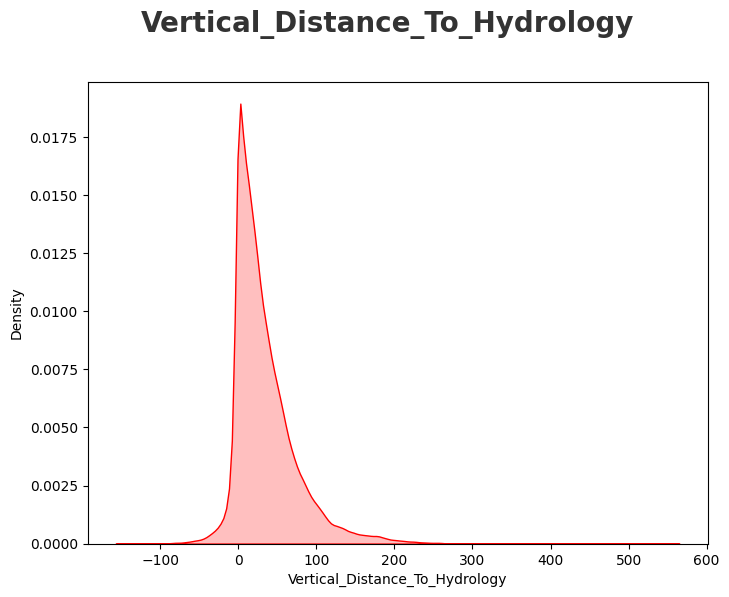

In [43]:
i='Vertical_Distance_To_Hydrology'
plt.figure(figsize=(8, 6))
plt.suptitle(i, fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.kdeplot(x=log_reg[i],shade=True, color='r')
plt.xlabel(i)

In [44]:
min_val_VDH = log_reg['Vertical_Distance_To_Hydrology'].min()
log_reg['Vertical_Distance_To_Hydrologyr2'] = np.sqrt(log_reg['Vertical_Distance_To_Hydrology'] - min_val_VDH + 1)


1.1914852220048695
2.6412552730050414


Text(0.5, 0, 'Vertical_Distance_To_Hydrologyr2')

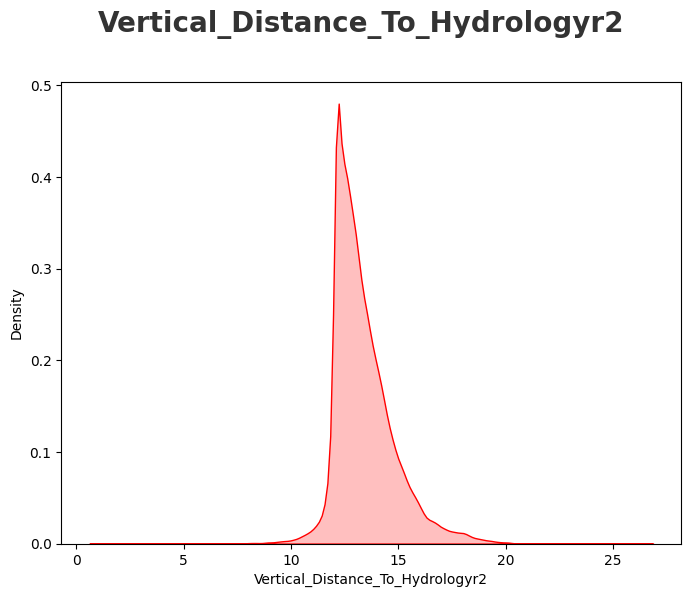

In [45]:
i='Vertical_Distance_To_Hydrologyr2'
print(log_reg[i].skew())
print(log_reg[i].kurtosis())
plt.figure(figsize=(8, 6))
plt.suptitle(i, fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.kdeplot(x=log_reg[i],shade=True, color='r')
plt.xlabel(i)

Text(0.5, 0, 'Hillshade_9am')

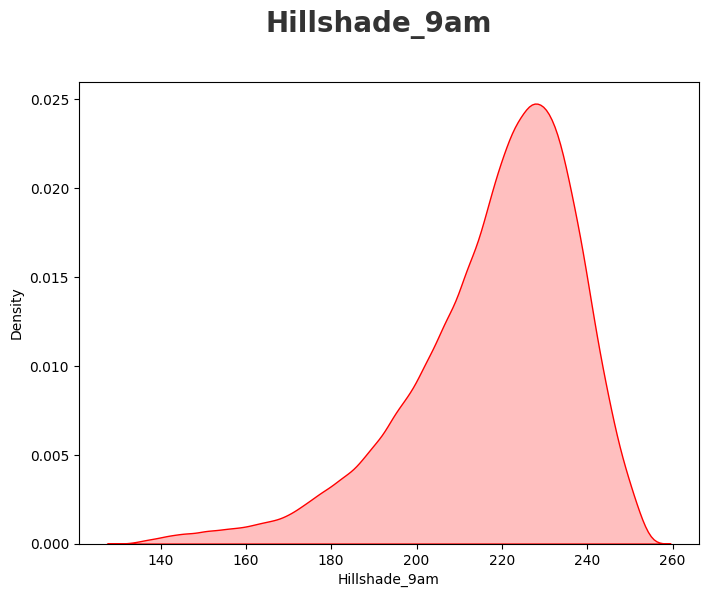

In [46]:
i='Hillshade_9am'
plt.figure(figsize=(8, 6))
plt.suptitle(i, fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.kdeplot(x=log_reg[i],shade=True, color='r')
plt.xlabel(i)

In [47]:
# Square root of reversed data
max_val_H9am=log_reg['Hillshade_9am'].max()
log_reg['Hillshade_9am_trans'] = np.sqrt(max_val_H9am + 1 - log_reg['Hillshade_9am'])

0.28460078218164403
0.07929715848955388


Text(0.5, 0, 'Hillshade_9am_trans')

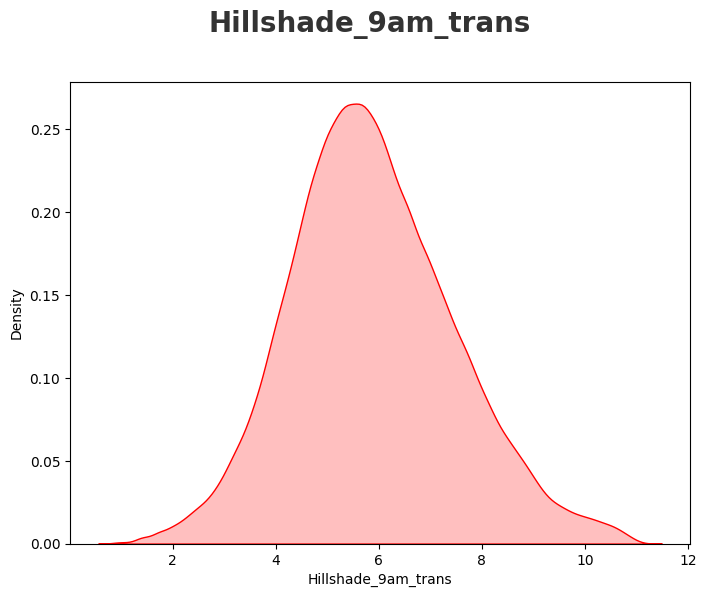

In [48]:
i='Hillshade_9am_trans'
print(log_reg[i].skew())
print(log_reg[i].kurtosis())
plt.figure(figsize=(8, 6))
plt.suptitle(i, fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.kdeplot(x=log_reg[i],shade=True, color='r')
plt.xlabel(i)

In [49]:
log_reg.columns

Index(['Unnamed: 0', 'Elevation', 'Slope', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Tv',
  

In [50]:
log_reg.drop('Hillshade_9am',axis=1,inplace=True)

In [51]:
log_reg.columns

Index(['Unnamed: 0', 'Elevation', 'Slope', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_16', 'Soil_Type_17',
       'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21',
       'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25',
       'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29',
       'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33',
       'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37',
       'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Tv', 'Aspectr2',
       

In [52]:
log_reg.isnull().sum().any()

np.False_

In [53]:
log_reg.drop('Unnamed: 0',axis=1,inplace=True)

In [54]:
log_reg.to_csv('model.csv',index=False)

In [ ]:
# storing constants used in transformation
skew_constants = {
    "Hillshade_9am_max": max_val_H9am,
    "Vertical_Distance_To_Hydrology_min": min_val_VDH
}

joblib.dump(skew_constants, "skew_constants.pkl")
print("Skew constants saved!")


Skew constants saved!


In [67]:
max_val_H9am

np.int64(254)

In [68]:
min_val_VDH

np.int64(-146)